In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## Visualizaion

In [20]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


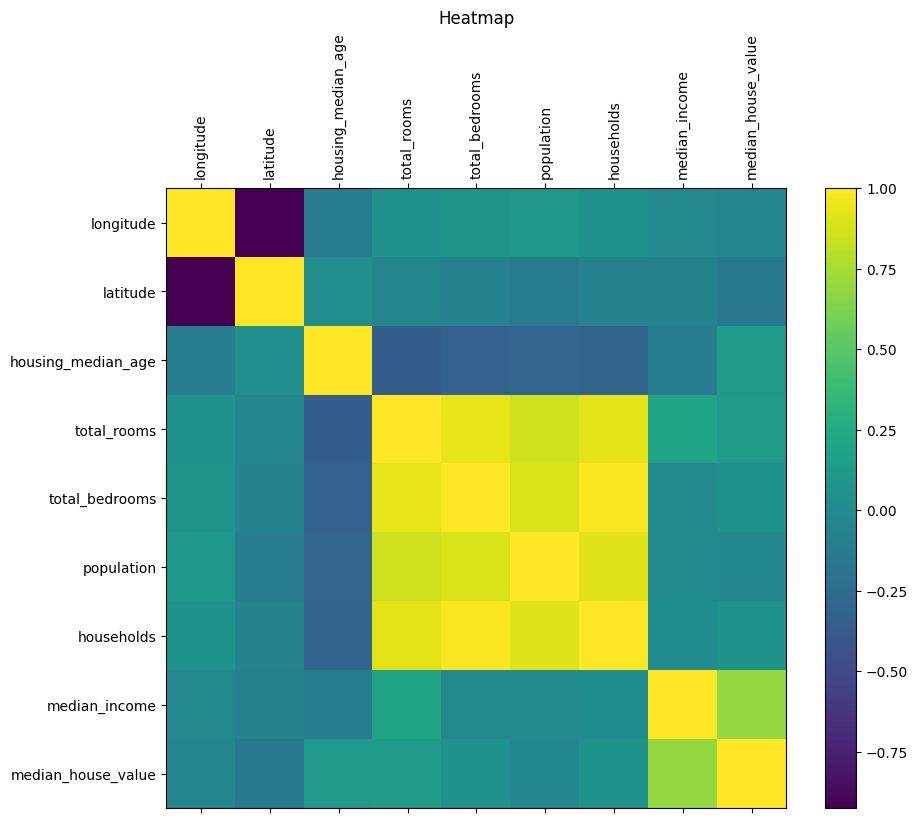

In [5]:
plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=1)
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.title('Heatmap')
plt.show()


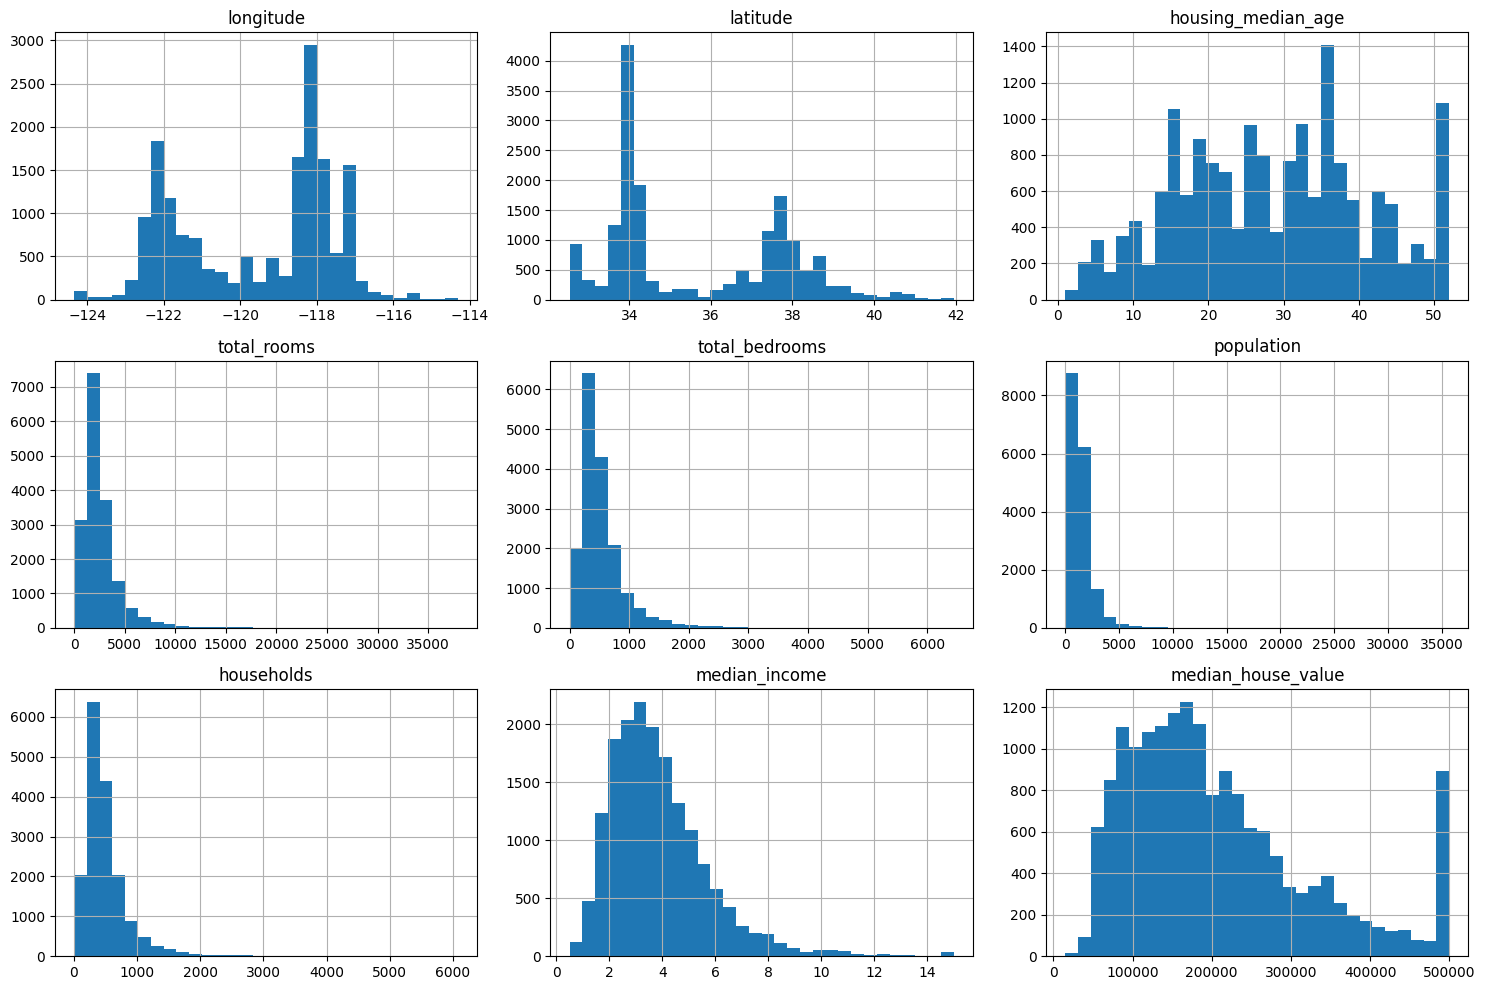

In [6]:
data.hist(bins=30, figsize=(15, 10))

plt.tight_layout()

plt.show()


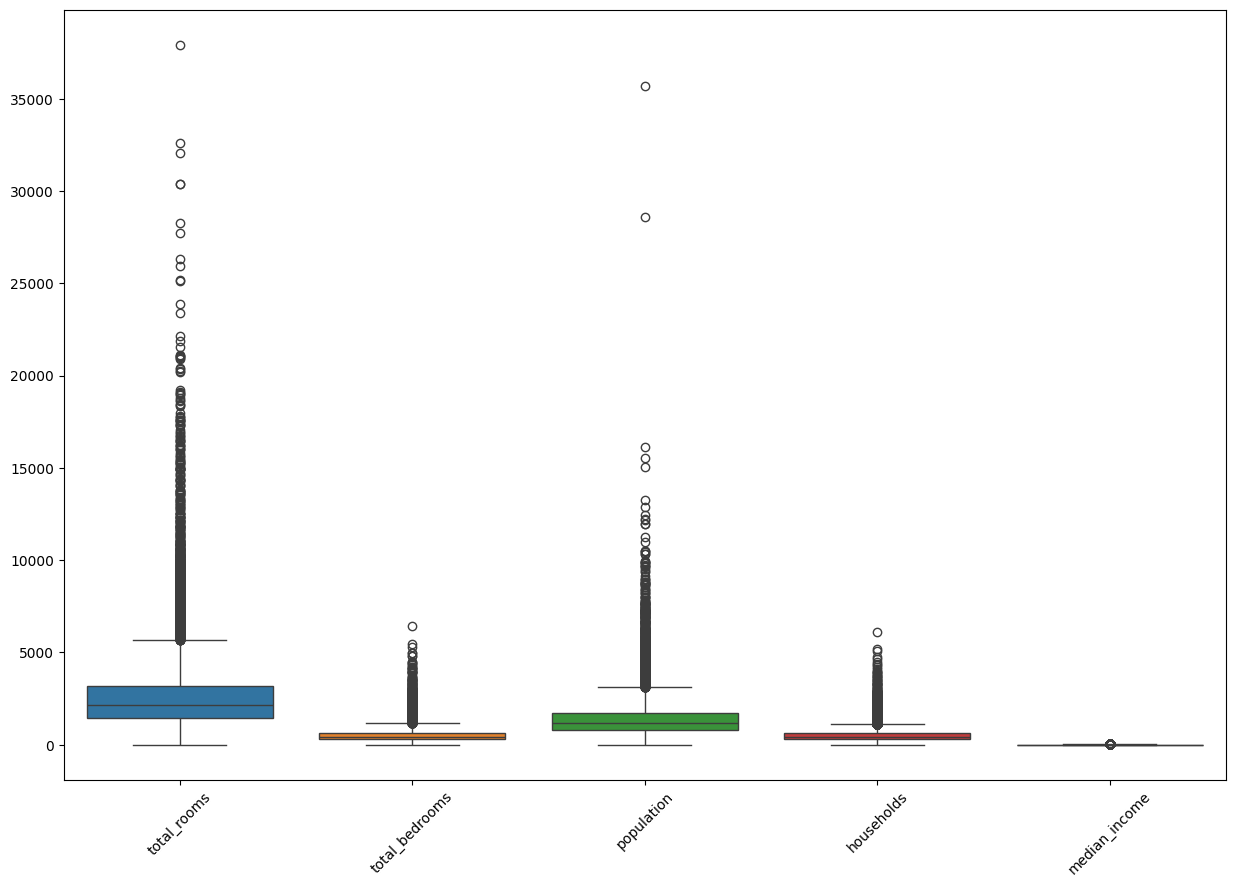

In [7]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=data[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']])

plt.xticks(rotation=45)

plt.show()


In [8]:
quantiles = data.quantile([0.25, 0.5, 0.75])

print(quantiles)


      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0.25    -121.79     33.93                18.0      1462.00          297.00   
0.50    -118.49     34.25                29.0      2127.00          434.00   
0.75    -118.00     37.72                37.0      3151.25          648.25   

      population  households  median_income  median_house_value  
0.25       790.0      282.00       2.566375            119400.0  
0.50      1167.0      409.00       3.544600            180400.0  
0.75      1721.0      605.25       4.767000            265000.0  


## Data preprocessing

In [9]:
scaler = MinMaxScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)

In [10]:
data_scaled

array([[1.        , 0.17534538, 0.2745098 , ..., 0.07745437, 0.06853009,
        0.10701193],
       [0.98406375, 0.19766206, 0.35294118, ..., 0.07597435, 0.09104012,
        0.13422831],
       [0.9750996 , 0.12221041, 0.31372549, ..., 0.01907581, 0.07937822,
        0.14577466],
       ...,
       [0.00498008, 0.98831031, 0.31372549, ..., 0.07482322, 0.1745769 ,
        0.18268172],
       [0.00498008, 0.98405951, 0.35294118, ..., 0.07844105, 0.10205376,
        0.14598084],
       [0.        , 0.8501594 , 1.        , ..., 0.04423615, 0.17343209,
        0.1641251 ]])

In [11]:
y = data_scaled[:, -1]
x = data_scaled[:, :-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

## Linear Regression

In [13]:
class MyLinearRegression:
    def __init__(self, epochs, learning_rate):
        self.learning_rate = learning_rate
        self.weights = np.array([np.random.rand() for i in range(0,3)])
        self.b = np.random.rand()
        self.losses = np.array([], dtype = np.float64)
        self.epochs = epochs

    predict = lambda self, x: np.dot(x, self.weights) + self.b

    def fit(self, x_train, y_train):
        self.y = y_train
        self.weights = np.array([np.random.rand() for i in range(x_train.shape[1])])
        for e in range(self.epochs):
            for i in range(x_train.shape[0]):
                pred = self.predict(x_train[i])
                loss = (pred - self.y[i]) ** 2




                dw = 2 * x_train[i] * (pred - self.y[i])
                db = 2 * (pred - self.y[i])

                self.weights -= self.learning_rate * dw
                self.b -= self.learning_rate * db

            self.losses =  np.append(self.losses, loss)
            # print(f"EPOCH = {e + 1}| LOSS = {loss}")


    def do_task(self, x_train, y_train):
        print("Weights: ", self.weights)
        print("Bias: ", self.b)
        y_pred = np.array(self.predict(x_train))
        residuals = y_train - y_pred
        RSS = np.sum(residuals ** 2)
        mean_y = np.mean(y_train)
        TSS = np.sum((y_train - mean_y) ** 2)

        R_squared = 1 - (RSS / TSS if TSS != 0 else 0)


        print("R²:", R_squared)


In [14]:
feature_sets_train = [X_train[:, 0:3], X_train[:, 3:6], X_train[:, 4:7]]
feature_sets_test = [X_test[:, 0:3], X_test[:, 3:6], X_test[:, 4:7]]
weights = []
for i in feature_sets_train:
  lr = MyLinearRegression(25, 0.01)
  lr.fit(i, y_train)
  weights.append(lr.weights)
print(weights)

[array([-1.4999624 , -1.36960234,  0.01917492]), array([ 2.55185869, -0.89119592, -2.29146997]), array([-0.21345713, -1.92141907,  1.32275591])]


In [15]:
for i in feature_sets_train:
  lr = MyLinearRegression(25, 0.01)
  lr.fit(i, y_train)
  lr.do_task(i, y_train)

Weights:  [-1.49996228 -1.36960223  0.01917493]
Bias:  1.5538576487356495
R²: 0.24363822811419655
Weights:  [ 2.57278562 -0.90800467 -2.2946295 ]
Bias:  0.3855247528528243
R²: 0.09165479126871634
Weights:  [-0.17418772 -2.0031704   1.32101034]
Bias:  0.3867577221291899
R²: 0.037123965537969705
